In [9]:
class node:
  def __init__(self ,parent, left, right , values , column, threshhold):
    self.parent:node = parent
    self.left:node  = left
    self.right:node = right
    self.values:np.ndarray = values
    self.column:int = column
    self.threshhold:float = threshhold

  def is_leaf(self):
    if self.values is None:
      return False
    return True

In [10]:
class DecisionTree:
    # Multiclass Decision Tree classifier

    def __init__(self):
        """
        Initialize the Decision Tree model.
        """
        self.tree = node(None, None, None, None, None, None)
        self.number_of_classes = -1
        self.classes = None

    def fit(self, X, Y, max_depth=5, kind='best', sample_size=20):
      #To DO
        """
        Fit the Decision Tree model to the provided data.

        Args:
        - X: Input features.
        - Y: Labels.
        - max_depth: Maximum depth of the decision tree.
        - kind: 'best' for best split(check all the possible splits),
         'random' for random split(check sample_size candidates for the splits on each column).
        - sample_size: Number of random samples to consider for splitting (for 'random' kind).

        Returns:
        - None

        Example:
        >>> tree = DecisionTree()
        >>> X = np.array([[1, 2], [2, 3], [3, 4]])
        >>> Y = np.array([0, 1, 2])
        >>> tree.fit(X, Y, max_depth=5, kind='best', sample_size=20)
        """

    def predict(self, X):
      #To DO
        """
        Predict class labels for input data.

        Args:
        - X: Input features for prediction.

        Returns:
        - Predicted class labels.

        Example:
        >>> tree = DecisionTree()
        >>> X = np.array([[2, 3], [3, 4]])
        >>> predicted_labels = tree.predict(X)
        """

    def _predict_tree(self, tree, X):
      #To DO
        """
        Predict class labels for input data using the decision tree.
        This function can be used recursively to buid the predictions.

        Args:
        - tree: Current decision tree node.
        - X: Input data for prediction.

        Returns:
        - Predicted class labels.

        Example:
        >>> tree = DecisionTree()
        >>> node = tree.tree
        >>> X = np.array([[2, 3], [3, 4]])
        >>> predicted_labels = tree._predict_tree(node, X)
        """

    def _tree_builder(self, tree, X, Y, depth):
      #To DO
        """
        Build the Decision Tree recursively.

        Args:
        - tree: Current decision tree node.
        - X: Input features for the current node.
        - Y: Labels for the current node.
        - depth: Current depth in the tree.

        Returns:
        - None

        Example:
        >>> tree = DecisionTree()
        >>> node = tree.tree
        >>> X = np.array([[1, 2], [2, 3], [3, 4]])
        >>> Y = np.array([0, 1, 0])
        >>> tree._tree_builder(node, X, Y, depth=1)
        """

    def _check_leaf(self, Y):
      #To DO
        """
        Check if the current node should be a leaf node based on the
        class labels or max_depth attribute.

        Args:
        - Y: Labels for the current node.

        Returns:
        - True if the node should be a leaf, False otherwise.

        Example:
        >>> tree = DecisionTree()
        >>> Y = np.array([0, 0, 0])
        >>> is_leaf = tree._check_leaf(Y)
        """

    def _build_leaf(self, node, Y):
      #To DO
        """
        Build a leaf node and assign class probabilities to node.values
        according to Y values in this node.
        The values must be an np.ndarray which the first index is
        the probability of the sample in this node to belong to
        class with label=self.classes[0] and so on for other indexes.

        Args:
        - node: Current decision tree node which is going to be a leaf.
        - Y: Labels for the current node.

        Returns:
        - None

        Example:
        >>> tree = DecisionTree()
        >>> node = tree.tree
        >>> Y = np.array([0, 1, 0])
        >>> tree._build_leaf(node, Y)
        """

    def _calculate_entropy(self, labels):
      #To DO
        """
        Calculate the entropy of a set of labels.

        Args:
        - labels: Input labels.

        Returns:
        - Entropy value.

        Example:
        >>> tree = DecisionTree()
        >>> labels = np.array([0, 1, 0, 1, 1])
        >>> entropy = tree._calculate_entropy(labels)
        """

    def _information_gain(self, X, Y, column, row):
      #To DO
        """
        Calculate information gain for a potential split.

        Args:
        - X: Input features for the split.
        - Y: Labels for the split.
        - column: Column index for the split.
        - row: row index for the split.

        Returns:
        - Information gain value.

        Example:
        >>> tree = DecisionTree()
        >>> X = np.array([[1, 2], [2, 3], [3, 4]])
        >>> Y = np.array([0, 1, 0])
        >>> gain = tree._information_gain(X, Y, column=1, threshold=2)
        """

    def _find_split(self, X, Y):
      #To DO
        """
        Find the best or best random split for the decision tree.
        Remember that there are two versions of this function according to the
        'kind' and 'sample_size' arguments that are provided to the constructor.
        The random samples must be in the range of the values in the dataset and
        they must be unique. The sample_size is an upper bound, as
        the unique values might be less than sample_size.


        Args:
        - X: Input features for the split.
        - Y: Labels for the split.

        Returns:
        - Tuple (best_row, best_column) representing the chosen split.

        Example:
        >>> tree = DecisionTree()
        >>> X = np.array([[1, 2], [2, 3], [3, 4]])
        >>> Y = np.array([0, 1, 0])
        >>> split = tree._find_split(X, Y)
        """



In [1]:
# 1.B
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


x=np.load('x.npy')
y=np.load('y.npy')


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [17]:
max_depth_values = [5, 10, 15,20]
min_samples_split_values = [2, 5, 10,15]

results = {} 

for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        results[(max_depth, min_samples_split)] = accuracy



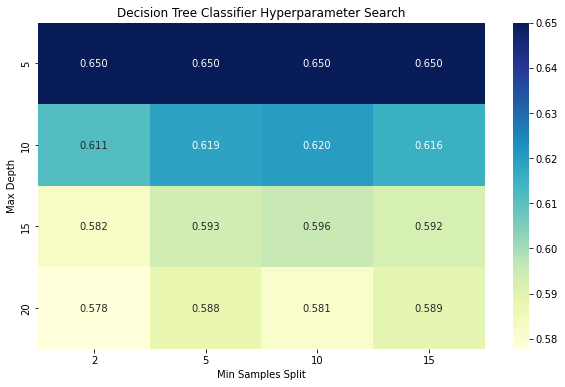

In [18]:
results_df = pd.DataFrame({'Max Depth': [params[0] for params in results.keys()],
                           'Min Samples Split': [params[1] for params in results.keys()],
                           'Accuracy': [accuracy for accuracy in results.values()]})

# Create a pivot table for the heatmap
pivot_table = results_df.pivot('Max Depth', 'Min Samples Split', 'Accuracy')

# Create a heatmap to visualize the results
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='.3f', cmap='YlGnBu')
plt.title('Decision Tree Classifier Hyperparameter Search')
plt.xlabel('Min Samples Split')
plt.ylabel('Max Depth')
plt.show()

In [2]:
# 1.C
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

accuracies={}
random_classifier=RandomForestClassifier()
random_classifier.fit(X_train,y_train)
random_predict=random_classifier.predict(X_test)
acc=accuracy_score(y_test,random_predict)

accuracies['Random Forest']=acc


sgd_classifier=SGDClassifier()
sgd_classifier.fit(X_train,y_train)
sgd_predict=random_classifier.predict(X_test)
acc=accuracy_score(y_test,sgd_predict)
accuracies['Gradiant']=acc

In [21]:
display(accuracies)

{'random': 0.6833333333333333, 'Gradiant': 0.6833333333333333}

In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score

train_sizes=[0.25,0.5,0.75,1]
Evaluations={}
accuracy_scores_random=[]
accuracy_scores_gradiant=[]



for trainSize in train_sizes:
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=trainSize, random_state=42)
    random_classifier=RandomForestClassifier()
    random_classifier.fit(X_train,y_train)
    random_predict=random_classifier.predict(X_test)
    precision = precision_score(y_test, random_predict,average=None)
    recall = recall_score(y_test, random_predict,average=None)
    f1 = f1_score(y_test, random_predict,average=None)
    random_acc= {"precision":precision,"recall":recall,'f1':f1}
    sgd_classifier=SGDClassifier()
    sgd_classifier.fit(X_train,y_train)
    sgd_predict=random_classifier.predict(X_test)
    precision = precision_score(y_test, sgd_predict,average=None)
    recall = recall_score(y_test, sgd_predict,average=None)
    f1 = f1_score(y_test, sgd_predict,average=None)
    sgd_acc= {"precision":precision,"recall":recall,'f1':f1}
    key='train Size ' + str(trainSize)
    Evaluations[key]={'Random':random_acc,'Gradiant':sgd_acc}
    accuracy_random = accuracy_score(y_test, random_predict)
    accuracy_score_gradiant = accuracy_score(y_test, sgd_predict)

    accuracy_scores_random.append(accuracy_random)
    accuracy_scores_gradiant.append(accuracy_score_gradiant)



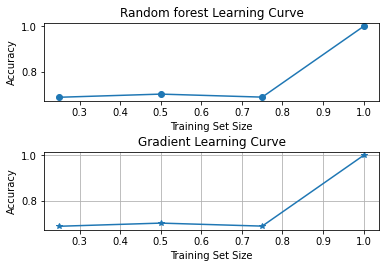

In [11]:
fig , axs=plt.subplots(2)
fig.tight_layout(pad=3)
# Plot the learning curve
axs[0].plot(train_sizes, accuracy_scores_random, marker='o')
axs[0].set_title('Random forest Learning Curve')
axs.flat[0].set(xlabel='Training Set Size',ylabel='Accuracy')

axs[1].plot(train_sizes, accuracy_scores_gradiant, marker='*')
axs[1].set_title('Gradient Learning Curve')
axs.flat[1].set(xlabel='Training Set Size',ylabel='Accuracy')

plt.grid(True)
plt.show()

In [15]:
for key in Evaluations.keys():
    print(key)
    print(Evaluations[key]['Random'])
    print(Evaluations[key]['Gradiant'])

train Size 0.25
{'precision': array([0.65201465, 0.73092369, 0.67628205, 0.72164948]), 'recall': array([0.6641791 , 0.65      , 0.71768707, 0.74204947]), 'f1': array([0.65804067, 0.68809074, 0.69636964, 0.73170732])}
{'precision': array([0.65201465, 0.73092369, 0.67628205, 0.72164948]), 'recall': array([0.6641791 , 0.65      , 0.71768707, 0.74204947]), 'f1': array([0.65804067, 0.68809074, 0.69636964, 0.73170732])}
train Size 0.5
{'precision': array([0.68828829, 0.73189824, 0.69550749, 0.72212693]), 'recall': array([0.67017544, 0.68      , 0.7372134 , 0.74777975]), 'f1': array([0.67911111, 0.70499529, 0.71575342, 0.73472949])}
{'precision': array([0.68828829, 0.73189824, 0.69550749, 0.72212693]), 'recall': array([0.67017544, 0.68      , 0.7372134 , 0.74777975]), 'f1': array([0.67911111, 0.70499529, 0.71575342, 0.73472949])}
train Size 0.75
{'precision': array([0.67505995, 0.70731707, 0.7092883 , 0.67631297]), 'recall': array([0.66785291, 0.66707022, 0.68691589, 0.74235294]), 'f1': array